In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [53]:
# Загрузка данных
data_source = pd.read_csv('/content/traff.csv', names=['Date', 'Value'])

In [54]:
# Преобразование строковых значений в числа и масштабирование данных
original_values = np.array([float(u.replace(',', '')) for u in data_source['Value'].to_numpy()]).reshape(-1, 1)
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(original_values)

In [55]:
# Создание последовательностей для временных рядов
def generate_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data)-sequence_length):
        seq = data[i:i+sequence_length]
        target = data[i+sequence_length:i+sequence_length+1]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [56]:
# Определение длины последовательностей
sequence_length = 60


In [57]:
# Создание последовательностей для обучающей и тестовой выборок
X_train, y_train = generate_sequences(train_data, sequence_length)
X_test, y_test = generate_sequences(test_data, sequence_length)


In [58]:
# Создание и обучение модели LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
26/26 [==============================] - 50s 54ms/step - loss: 0.0295 - val_loss: 0.0190
Epoch 2/50
26/26 [==============================] - 1s 31ms/step - loss: 0.0063 - val_loss: 0.0083
Epoch 3/50
26/26 [==============================] - 1s 30ms/step - loss: 0.0046 - val_loss: 0.0080
Epoch 4/50
26/26 [==============================] - 1s 40ms/step - loss: 0.0043 - val_loss: 0.0079
Epoch 5/50
26/26 [==============================] - 1s 46ms/step - loss: 0.0042 - val_loss: 0.0079
Epoch 6/50
26/26 [==============================] - 1s 46ms/step - loss: 0.0042 - val_loss: 0.0078
Epoch 7/50
26/26 [==============================] - 1s 46ms/step - loss: 0.0042 - val_loss: 0.0083
Epoch 8/50
26/26 [==============================] - 1s 32ms/step - loss: 0.0042 - val_loss: 0.0077
Epoch 9/50
26/26 [==============================] - 1s 31ms/step - loss: 0.0041 - val_loss: 0.0082
Epoch 10/50
26/26 [==============================] - 1s 31ms/step - loss: 0.0041 - val_loss: 0.0086
Epoch 11

In [59]:
# Прогнозирование на тестовой выборке
predictions = model.predict(X_test)

5/5 [==============================] - 1s 13ms/step


In [60]:
# Инверсия шкалы для обратного масштабирования
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

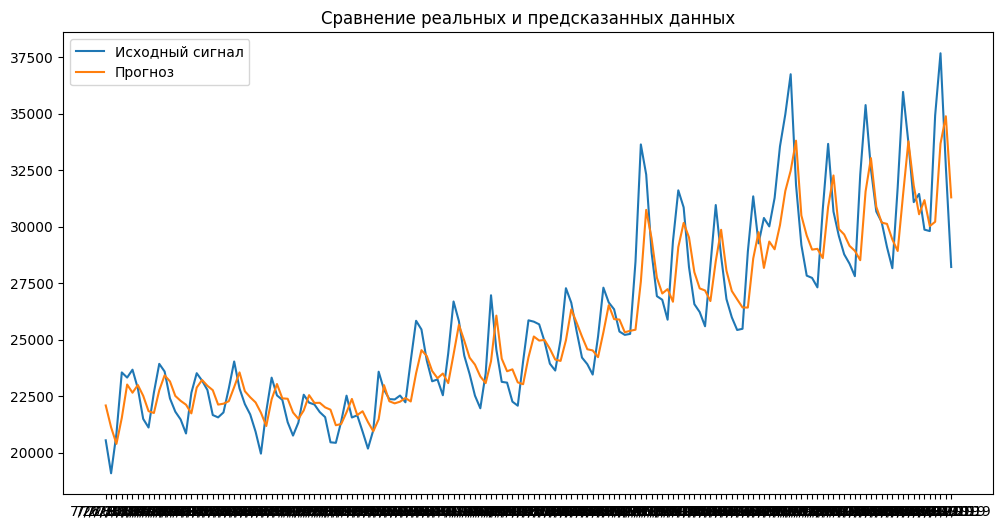

In [63]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(data_source['Date'].iloc[-len(y_test):], y_test, label='Исходный сигнал')
plt.plot(data_source['Date'].iloc[-len(predictions):], predictions, label='Прогноз')
plt.title('Сравнение реальных и предсказанных данных')
plt.legend()
plt.show()